This week I choose to visualize Option 1. The items I will visualize are:

1. Relationship between the year acquired and the year constructed;
2. Total square footage as a function of congressional district ("Congress Dist");
3. Average square footage per floor as a function of congressional district.

### Get things ready

In [61]:
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt

Read in the data with pandas. You should change the path to yours.

In [62]:
buildings=pd.read_csv('OneDrive/文档/courses/IS 445/material/building_inventory.csv')

In [63]:
buildings

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


### Plot 1: x = year constructed, y = year acquired 

From the dataframe above we can see that, in the year constructed column and the year acquired column there are 0s, which mean missing values and will affect our visualization. Therefore, I try to find out the actual earliest year and latest year by using `min()` and `max()`, so that I can set limits to the axes of the visualization and the 0s will not be seen.

In [70]:
print(buildings[buildings['Year Constructed']!=0]['Year Constructed'].min(),
buildings[buildings['Year Constructed']!=0]['Year Constructed'].max(),
buildings[buildings['Year Acquired']!=0]['Year Acquired'].min(),
buildings[buildings['Year Constructed']!=0]['Year Acquired'].max())

1753 2019 1753 2019


I use a scatter chart to visualze the relationship and set the limits of x-axis and y-axis based on the above results.

** Reference of setting title fontsize: https://dfrieds.com/data-visualizations/style-plots-python-matplotlib.html#:~:text=For%20the%20methods%20title%20%2C%20xlabel,smaller%20fonts%20than%20axes%20labels. 

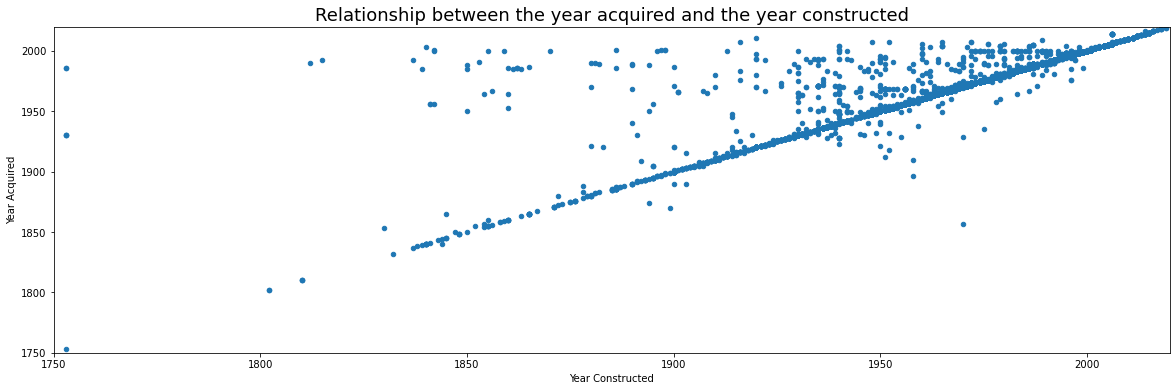

In [80]:
ax1=buildings.plot(x='Year Constructed',y='Year Acquired',figsize=(20,6),kind='scatter')
ax1.set_xlim(1750,2020)
ax1.set_ylim(1750,2020)
ax1.set_title('Relationship between the year acquired and the year constructed',fontsize=18)
plt.show()

Successes of the approach:

- Remove the buildings with missing value as 0 from the visualization;
- The scattered dots reveal much information about the relationship:
    - Most buildings were constructed and acquired in the same year;
    - Other than those, many buildings were acquired later than constructed;
    - Some were constructed later than acquired, strangely. (A reasonable guess might be the reconstruction.) 
    
Shortcomings of the approach:
- Actually the missing values are still there; (Maybe cleaning them out before processing the data will be better.) 
- Only a few tick values are presented in the visualization at an interval of 50 years. 

### Plot 2: x = Congress Dist, y = Total Square Footage

Use `groupby()` and `sum()` to get the data we want. 

Note: When I inspect the data I get here and those I get for plot 3, I find that here the data type is a pandas series while there it is a pandas dataframe. This difference causes me a lot of troubles when I try to call the index--'Congress Dist' in the same way for the two plots. So I change the series to a dataframe here by using `pd.DataFrame()`. 

In [66]:
sum_data=pd.DataFrame(buildings.groupby('Congress Dist')['Square Footage'].sum())
sum_data

,Square Footage
Congress Dist,
0,793124
1,2351762
2,6285684
3,1293687
4,317741
5,1809022
6,145659
7,9211651
8,1461548


I use a bar chart to make the visualization. The ticks for x-axis are originally decimals but their actual meaning requires them to be an integer. So I change them with `plt.xticks()` and `range()`. 

** Reference of setting xticks: https://stackoverflow.com/questions/52229875/how-to-force-matplotlib-to-show-values-on-x-axis-as-integers

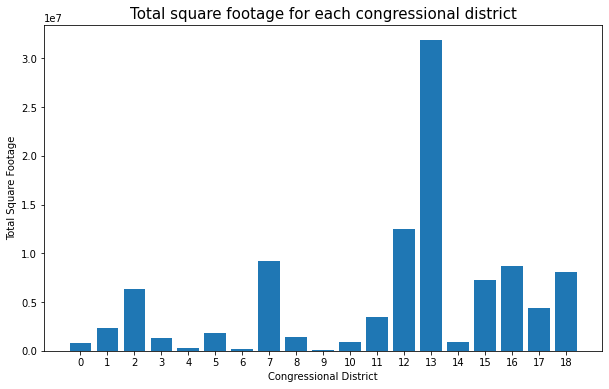

In [92]:
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(sum_data.index,sum_data['Square Footage'])
plt.xticks(range(0,19))
plt.xlabel('Congressional District')
plt.ylabel('Total Square Footage')
plt.title('Total square footage for each congressional district',fontsize=15)
plt.show()

If not changing it to a dataframe, we can still visualize it by calling the following demand:

`ax2=sum_data.plot(x='Congress Dist',y='Square Footage',kind='bar',ylabel='Total Square Footage',rot=0)`

Successes of the approach:

- Clearly show the data of each congressional district with a bar chart, a way that readers can compare them easily.

Shortcomings of the approach:

- The scientific notation on the y-axis may cause difficulty in reading the data for those who are unfamiliar with it.
- Readers cannot get the exact number for each district from the visualization.

### Plot 3: x = Congress Dist, y = Average Square Footage per Floor

Get the data of the Average Square Footage per Floor by the Total Square Footage divided by the amount of the floors. Then create a column for this kind of data in the dataframe.

In [89]:
avg_data=buildings.groupby('Congress Dist')['Square Footage','Total Floors'].sum()
avg_data['Average SF']=avg_data['Square Footage']/avg_data['Total Floors']
avg_data

C:\Users\HP\anaconda3\envs\DataViz\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Square Footage,Total Floors,Average SF
Congress Dist,,,
0,793124,216,3671.870370
1,2351762,134,17550.462687
2,6285684,647,9715.122102
3,1293687,72,17967.875000
4,317741,21,15130.523810
5,1809022,113,16009.044248
6,145659,28,5202.107143
7,9211651,517,17817.506770
8,1461548,312,4684.448718


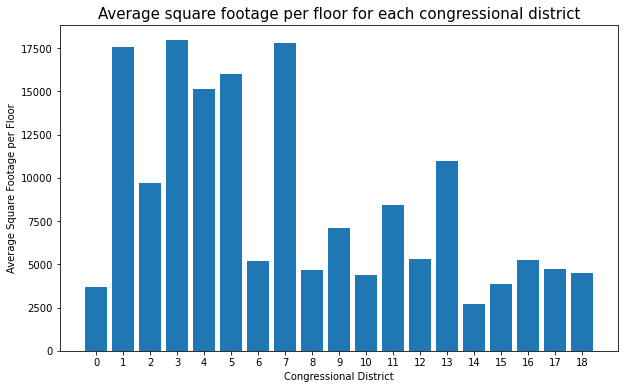

In [91]:
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(avg_data.index,avg_data['Average SF'])
plt.xticks(range(0,19))
plt.xlabel('Congressional District')
plt.ylabel('Average Square Footage per Floor')
plt.title('Average square footage per floor for each congressional district',fontsize=15)
plt.show()

Successes of the approach:

- Get and visualize the data of average square footage per floor in a relatively simple process. (only one more step than the process in plot 2) 
- The ticks on the y-axis are automatically rounded so that readers won't bother with the decimals.

Shortcomings of the approach:

- Readers cannot get the exact number for each district from the visualization.
- The same color for all bars might get readers tired in identifying each one.